In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [10]:
data = pd.read_csv('../../Data/Data Clustering.csv')
df = data.copy()

df.head()

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
0,Customer 0,134921,12,11244
1,Customer 1,20672,3,6891
2,Customer 2,17148,4,4287
3,Customer 3,381243,4,95311
4,Customer 4,10,0,10


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [12]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']
X = df[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

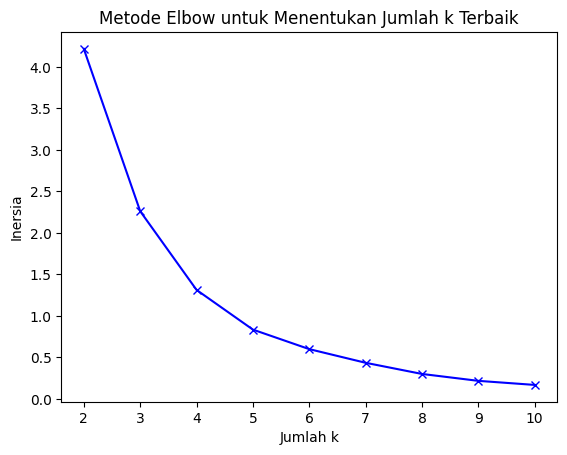

In [13]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [14]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.6343480726905277
CH Index Score = 169.74313377287834

Jumlah Cluster = 3
Silhouette Score = 0.6427048132797701
CH Index Score = 207.0439538140205

Jumlah Cluster = 4
Silhouette Score = 0.5613142333799158
CH Index Score = 263.3515289389647

Jumlah Cluster = 5
Silhouette Score = 0.5726699065402356
CH Index Score = 324.3211899958849

Jumlah Cluster = 6
Silhouette Score = 0.5805159976304833
CH Index Score = 366.92181452388036

Jumlah Cluster = 7
Silhouette Score = 0.5948174865975683
CH Index Score = 424.85202351032444

Jumlah Cluster = 8
Silhouette Score = 0.5599837357372445
CH Index Score = 529.5456248996408

Jumlah Cluster = 9
Silhouette Score = 0.5626562044355213
CH Index Score = 639.969135493779

Jumlah Cluster = 10
Silhouette Score = 0.5678881603828331
CH Index Score = 731.3306613313924


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 3
Nilai Silhoutte Score = 0.6427048132797701

Jumlah Cluster CH Index = 10


In [15]:
kmeans = KMeans(n_clusters=5, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

0    52
3    28
1    22
4    16
2     1
Name: cluster, dtype: int64

In [16]:
df1 = data.copy()

df1['cluster'] = df['cluster'].astype(str)

In [17]:
df1

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 0,134921,12,11244,3
1,Customer 1,20672,3,6891,0
2,Customer 2,17148,4,4287,0
3,Customer 3,381243,4,95311,0
4,Customer 4,10,0,10,0
...,...,...,...,...,...
114,Customer 114,949,7,136,0
115,Customer 115,0,2,0,0
116,Customer 116,222204,20,13071,1
117,Customer 117,0,1,0,0


In [18]:
df1.groupby('cluster')['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata'].mean().sort_values('Total', ascending=False)

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_11184\1641286308.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('cluster')['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata'].mean().sort_values('Total', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
2,56674832.000,36.000,3333814.000
4,1331543.562,32.750,78326.625
3,726622.071,12.536,73291.036
1,188711.500,22.000,11101.136
0,91414.250,4.077,17080.865


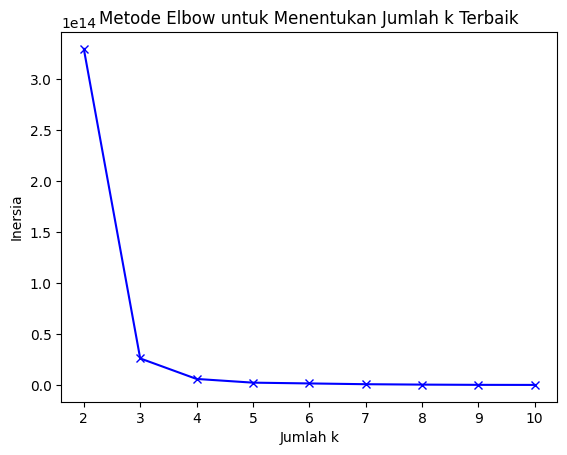

In [19]:
df2 = data.copy()
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']
X = df2[fitur]

n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [20]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.9772046924154703
CH Index Score = 1116.2744764218985

Jumlah Cluster = 3
Silhouette Score = 0.9609950512774136
CH Index Score = 7628.084418898442

Jumlah Cluster = 4
Silhouette Score = 0.8755528204473064
CH Index Score = 21805.657240009805

Jumlah Cluster = 5
Silhouette Score = 0.785404037396296
CH Index Score = 40303.73823786111

Jumlah Cluster = 6
Silhouette Score = 0.7592505384469728
CH Index Score = 46402.5400966027

Jumlah Cluster = 7
Silhouette Score = 0.7443921240731303
CH Index Score = 69443.29759219234

Jumlah Cluster = 8
Silhouette Score = 0.7440538999167269
CH Index Score = 103035.73807699198

Jumlah Cluster = 9
Silhouette Score = 0.7280848307223349
CH Index Score = 159685.94124145186

Jumlah Cluster = 10
Silhouette Score = 0.723436721380786
CH Index Score = 182331.63459548022


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.9772046924154703

Jumlah Cluster CH Index = 10


In [21]:
kmeans = KMeans(n_clusters=5, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

df2['cluster'] = kmeans.labels_
df2['cluster'].value_counts()

0    93
4    17
3     6
2     2
1     1
Name: cluster, dtype: int64

In [22]:
df2.groupby('cluster')['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata'].mean().sort_values('Total', ascending=False)

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_11184\839972138.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('cluster')['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata'].mean().sort_values('Total', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
1,56674832.000,36.000,3333814.000
2,12601272.500,21.500,1083542.500
3,1995790.833,19.500,176396.833
4,545608.824,18.294,50192.588
0,44114.720,11.828,3860.914


In [23]:
df.describe()

,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
count,119.000,119.000,119.000,119.000
mean,901093.622,13.504,65307.723,1.445
std,5418326.938,10.702,338302.602,1.555
min,0.000,0.000,0.000,0.000
25%,1713.000,4.000,203.000,0.000
50%,29912.000,11.000,3509.000,1.000
75%,212140.000,20.000,15273.000,3.000
max,56674832.000,41.000,3333814.000,4.000
